In [33]:
from models.cifrador_homomorfico_parcial import CifradorHomomorficoParcial
from models.cifrador_homomorfico_completo import CifradorHomomorficoCompleto
from models.cifrador_asimetrico import CifradorAsimetrico
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
def wrapped(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        elapsed = end - start
        return result, elapsed

    return wrapper

In [35]:
@wrapped
def encriptar(cifrador, numero):
    return cifrador.encriptar(numero)


@wrapped
def desencriptar(cifrador, numero):
    return cifrador.desencriptar(numero)

@wrapped
def suma(numero1, numero2):
    return numero1 + numero2

In [36]:
def tiempos_operacion_cifrador(cifrador, numeros, operacion):
    tiempos = []
    numeros_operacion = []
    for numero in numeros:
        numero_operado, elapsed_time = operacion(cifrador, numero)
        tiempos.append(elapsed_time)
        numeros_operacion.append(numero_operado)
    return tiempos, numeros_operacion

def tiempos_operaciones_algebraicas(numeros1, numeros2, operacion):
    if len(numeros1) != len(numeros2):
        raise ValueError("Las listas de numeros tienen diferentes longitudes")
    tiempos = []
    numeros_operacion = []
    for numero1, numero2 in zip(numeros1, numeros2):
        numero_operado, elapsed_time = operacion(numero1, numero2)
        tiempos.append(elapsed_time)
        numeros_operacion.append(numero_operado)
    return tiempos, numeros_operacion    

In [37]:
def tiempos_cifrado(cifrador, numeros):
    return tiempos_operacion_cifrador(cifrador, numeros, encriptar)


def tiempos_descifrado(cifrador, numeros_encriptados):
    return tiempos_operacion_cifrador(cifrador, numeros_encriptados, desencriptar)


def tiempos_suma(numeros1, numeros2):
    return tiempos_operaciones_algebraicas(numeros1, numeros2, suma)    

In [6]:
def barplot_tiempos_cifrado(tiempos, titulo, xlabel):
    import warnings

    # Suppress FutureWarnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    sns.histplot(tiempos, bins=10)
    plt.xlabel(xlabel)
    plt.ylabel('Frecuencia')
    plt.title(titulo)
    plt.show()

# Análisis de tiempos de cifrado

In [7]:
random.seed(42)
random_numbers = [random.randint(1, 10000) for _ in range(500)]

In [8]:
cifrador_homomorfico_parcial = CifradorHomomorficoParcial()
tiempos_del_parcial, numeros_encriptados_parcial = tiempos_cifrado(cifrador_homomorfico_parcial, random_numbers)

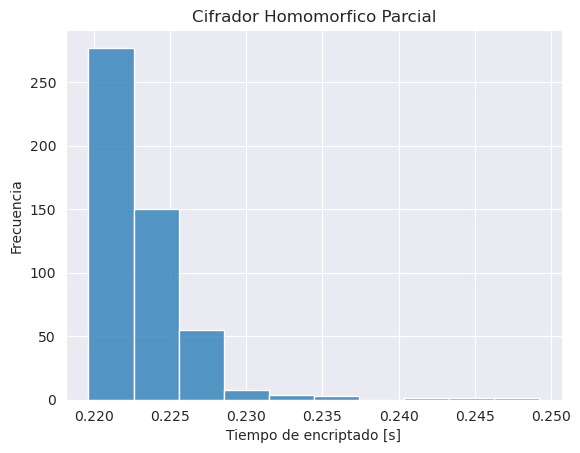

In [9]:
barplot_tiempos_cifrado(tiempos_del_parcial, 'Cifrador Homomorfico Parcial', 'Tiempo de encriptado [s]')

In [10]:
cifrador_homomorfico_completo_bfv = CifradorHomomorficoCompleto()
tiempos_del_parcial_completo_bfv, numeros_encriptados_completo_bfv = tiempos_cifrado(cifrador_homomorfico_completo_bfv,
                                                                                     random_numbers)

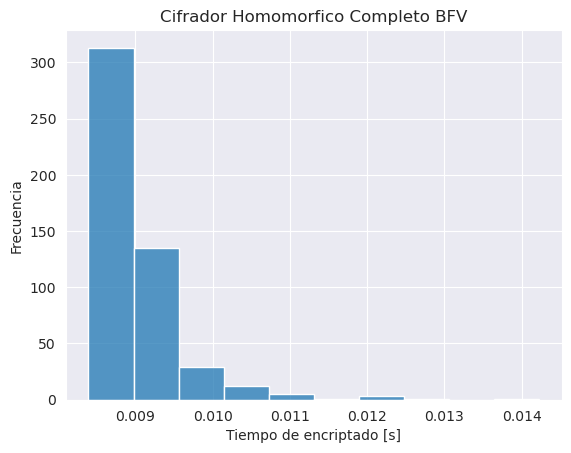

In [11]:
barplot_tiempos_cifrado(tiempos_del_parcial_completo_bfv, 'Cifrador Homomorfico Completo BFV',
                        'Tiempo de encriptado [s]')

In [12]:
CKKS_PARAMS = {
    'scheme': 'CKKS',  # can also be 'ckks'
    'n': 2 ** 14,  # Polynomial modulus degree. For CKKS, n/2 values can be
    #  encoded in a single ciphertext.
    #  Typ. 2^D for D in [10, 15]
    'scale': 2 ** 30,  # All the encodings will use it for float->fixed point
    #  conversion: x_fix = round(x_float * scale)
    #  You can use this as default scale or use a different
    #  scale on each operation (set in HE.encryptFrac)
    'qi_sizes': [60, 30, 30, 30, 60]  # Number of bits of each prime in the chain.
    # Intermediate values should be  close to log2(scale)
    # for each operation, to have small rounding errors.
}

In [13]:
cifrador_homomorfico_completo_ckks = CifradorHomomorficoCompleto(context_gen_params=CKKS_PARAMS)
tiempos_del_parcial_completo_ckks, numeros_encriptados_completo_ckks = tiempos_cifrado(
    cifrador_homomorfico_completo_ckks,
    random_numbers)

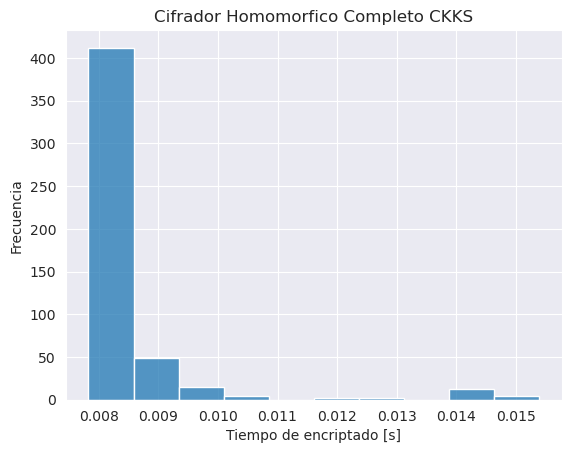

In [14]:
barplot_tiempos_cifrado(tiempos_del_parcial_completo_ckks, 'Cifrador Homomorfico Completo CKKS',
                        'Tiempo de encriptado [s]')

In [15]:
cifrador_homomorfico_asimetrico = CifradorAsimetrico()
tiempos_del_parcial_asimetricos, numeros_encriptados_asimetricos = tiempos_cifrado(cifrador_homomorfico_asimetrico,
                                                                                   random_numbers)

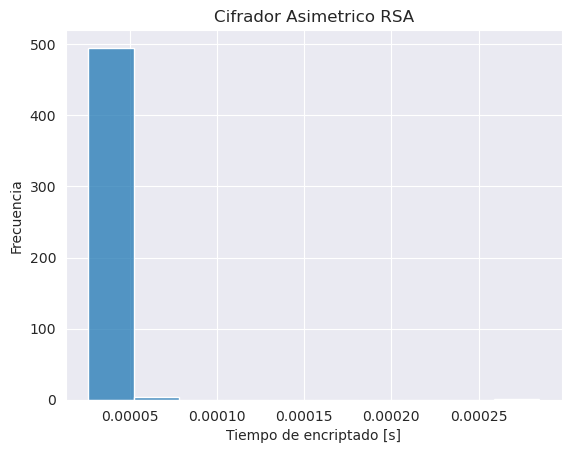

In [16]:
barplot_tiempos_cifrado(tiempos_del_parcial_asimetricos, 'Cifrador Asimetrico RSA', 'Tiempo de encriptado [s]')

# Análisis de tiempos para desencriptar

In [17]:
tiempos_desencriptado_parcial, numeros_desencriptados_parcial = tiempos_descifrado(cifrador_homomorfico_parcial,
                                                                                   numeros_encriptados_parcial)

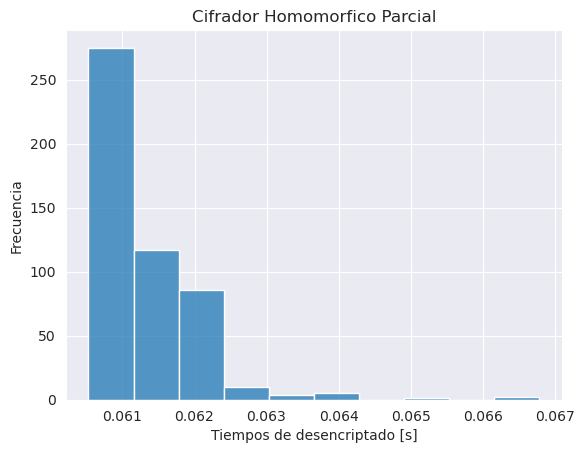

In [18]:
barplot_tiempos_cifrado(tiempos_desencriptado_parcial, 'Cifrador Homomorfico Parcial', 'Tiempos de desencriptado [s]')

In [19]:
tiempos_desencriptado_completo_bfv, numeros_desencriptados_completo_bfv = tiempos_descifrado(
    cifrador_homomorfico_completo_bfv,
    numeros_encriptados_completo_bfv)

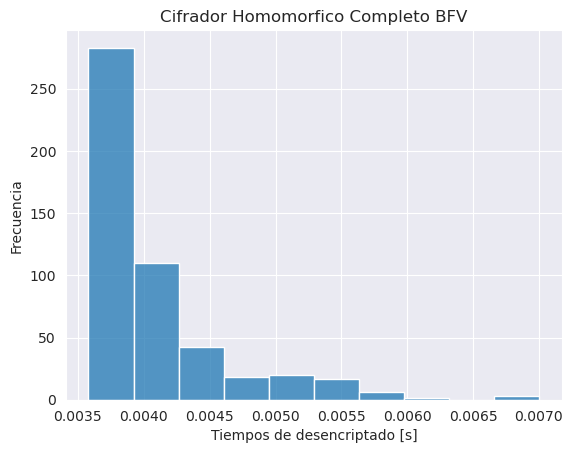

In [20]:
barplot_tiempos_cifrado(tiempos_desencriptado_completo_bfv, 'Cifrador Homomorfico Completo BFV',
                        'Tiempos de desencriptado [s]')

In [21]:
tiempos_desencriptado_completo_ckks, numeros_desencriptados_completo_ckks = tiempos_descifrado(
    cifrador_homomorfico_completo_ckks,
    numeros_encriptados_completo_ckks)

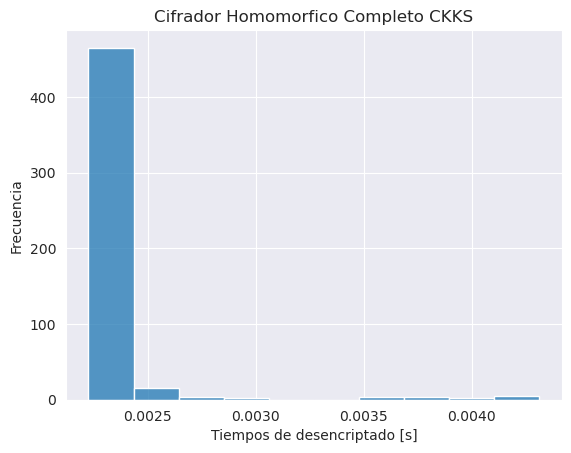

In [22]:
barplot_tiempos_cifrado(tiempos_desencriptado_completo_ckks, 'Cifrador Homomorfico Completo CKKS',
                        'Tiempos de desencriptado [s]')

## Además verificamos la presición de los numeros

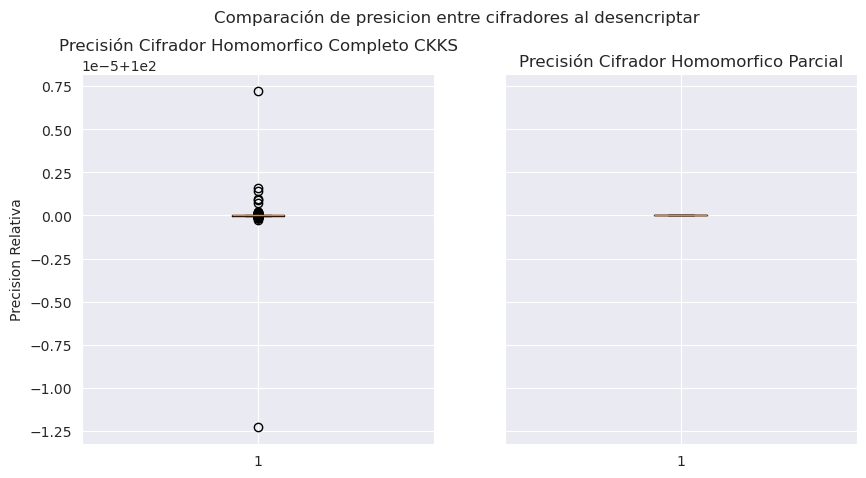

In [23]:
def calcular_presicion_relativa(original, decrypted):
    return (1 - (original - decrypted) / original) * 100

precision_ckks = [calcular_presicion_relativa(original, decrypted) for original, decrypted in zip(random_numbers, numeros_desencriptados_completo_ckks)]
precision_parcial = [calcular_presicion_relativa(original, decrypted) for original, decrypted in zip(random_numbers, numeros_desencriptados_parcial)]

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
plt.subplots_adjust(top=0.85, hspace=0.5)

axes[0].boxplot(precision_ckks)
axes[0].set_title('Precisión Cifrador Homomorfico Completo CKKS')
axes[0].set_ylabel('Precision Relativa')

axes[1].boxplot(precision_parcial)
axes[1].set_title('Precisión Cifrador Homomorfico Parcial')

plt.suptitle('Comparación de presicion entre cifradores al desencriptar')
plt.show()

In [24]:
tiempos_desencriptado_asimetricos, numeros_desencriptados_asimetricos = tiempos_descifrado(
    cifrador_homomorfico_asimetrico,
    numeros_encriptados_asimetricos)

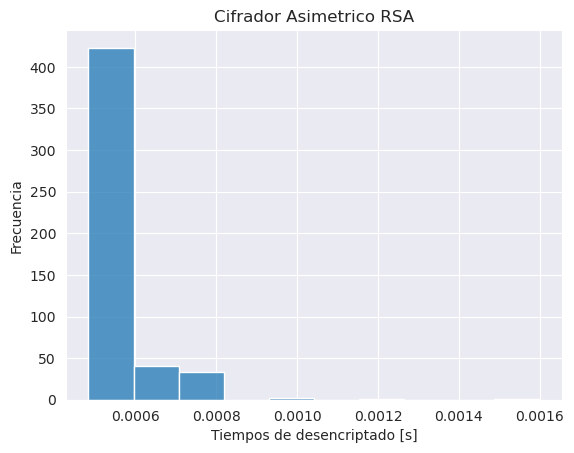

In [25]:
barplot_tiempos_cifrado(tiempos_desencriptado_asimetricos, 'Cifrador Asimetrico RSA',
                        'Tiempos de desencriptado [s]')

# Análisis de tiempos de suma

In [38]:
mitad = len(numeros_encriptados_parcial) // 2
numeros_encriptados_parcial1 = numeros_encriptados_parcial[mitad:]
numeros_encriptados_parcial2 = numeros_encriptados_parcial[:mitad]

tiempo_suma_encriptados_parcial, suma_encriptada_parcial = tiempos_suma(numeros_encriptados_parcial1, numeros_encriptados_parcial2)

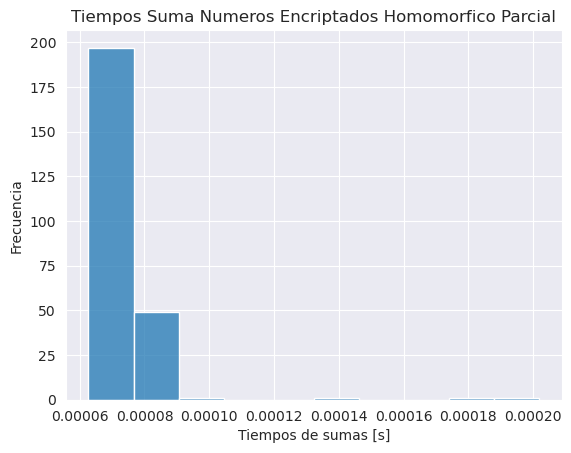

In [42]:
barplot_tiempos_cifrado(tiempo_suma_encriptados_parcial, titulo='Tiempos Suma Numeros Encriptados Homomorfico Parcial', xlabel='Tiempos de sumas [s]')

In [44]:
mitad = len(numeros_encriptados_completo_bfv) // 2
numeros_encriptados_completo_bfv1 = numeros_encriptados_completo_bfv[mitad:]
numeros_encriptados_completo_bfv2 = numeros_encriptados_completo_bfv[:mitad]

tiempo_suma_encriptados_completo_bfv, suma_encriptada_completo_bfv = tiempos_suma(numeros_encriptados_completo_bfv1, numeros_encriptados_completo_bfv2)

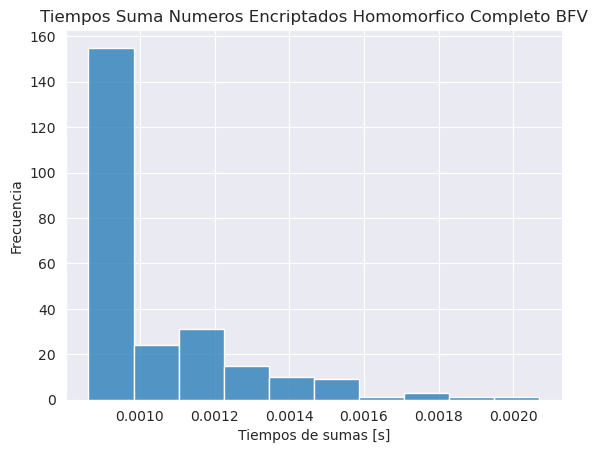

In [46]:
barplot_tiempos_cifrado(tiempo_suma_encriptados_completo_bfv, titulo='Tiempos Suma Numeros Encriptados Homomorfico Completo BFV', xlabel='Tiempos de sumas [s]')

# Análisis de tiempos de resta

# Análisis de tiempos de multiplicación

## Multiplicación número encriptado con número sin encriptar

## Multiplicación de dos números encriptados